# Une régression logistique sur le jeu de données Iris

Petite manip bonus qui n'a rien à voir avec le sujet : afficher une photo d'iris en haut de ce notebook.

![Iris 2](https://jardinage.lemonde.fr/images/dossiers/historique/iris-2-114805.jpg)

## Importer les librairies

Vous aurez besoin de pandas, matplotlib, seaborn (et numpy ?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importer les données et commencer à explorer le dataset

In [7]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analyse de données : visualisation

Faire apparaître sur une même figure (idéalement un même graphique !) la relation entre chaque feature et chaque espèce d'iris.

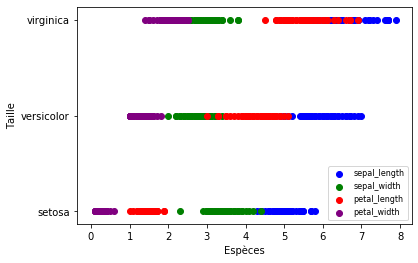

In [38]:
plt.xlabel('Espèces')
plt.ylabel('Taille')

plt.scatter(data['sepal_length'], data['species'], color='blue', label='sepal_length')
plt.scatter(data['sepal_width'], data['species'], color='green', label='sepal_width')
plt.scatter(data['petal_length'], data['species'], color='red', label='petal_length')
plt.scatter(data['petal_width'], data['species'], color='purple', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

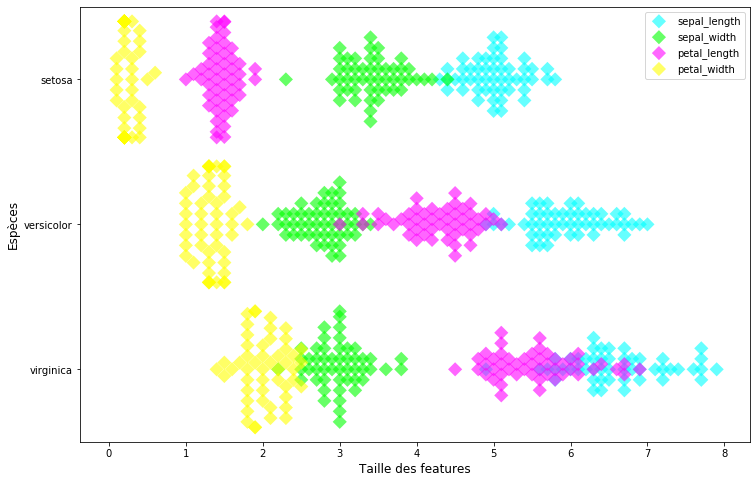

In [114]:
fig,ax = plt.subplots(figsize=(12,8))

sns.swarmplot(y="species", x="sepal_length", data=data,
              color="aqua", size=10, marker="D", edgecolor="gray", alpha=.6,
              ax=ax, label="sepal_length")
sns.swarmplot(y="species", x="sepal_width", data=data,
              color="lime", size=10, marker="D", edgecolor="gray", alpha=.6,
              ax=ax, label="sepal_width")
sns.swarmplot(y="species", x="petal_length", data=data,
              color="fuchsia", size=10, marker="D", edgecolor="gray", alpha=.6,
              ax=ax, label="petal_length")
sns.swarmplot(y="species", x="petal_width", data=data,
              color="yellow", size=10, marker="D", edgecolor="gray", alpha=.6,
              ax=ax, label="petal_width")

ax.set_xlabel("Taille des features", fontsize=12)
ax.set_ylabel("Espèces", fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::3],labels[::3])

plt.show()


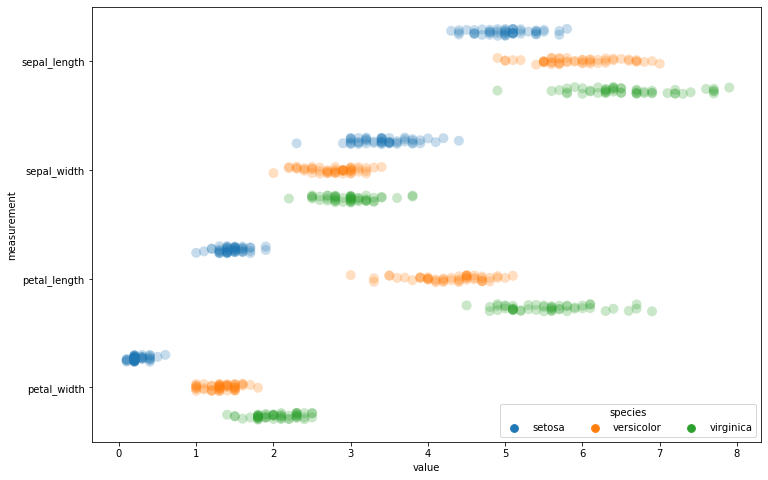

In [128]:
iris = pd.melt(data, "species", var_name="measurement")

fig, ax = plt.subplots(figsize=(12,8))

sns.stripplot(x="value", y="measurement", hue="species", data=iris, dodge=True, jitter=True,size=10, alpha=.25)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], title="species", loc="lower right", ncol=3)
plt.show()

## Création d'un train set et test set

In [94]:
from sklearn.model_selection import train_test_split
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

## Création et entraînement du modèle

In [96]:
#Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',multi_class='auto',penalty='none')
model.fit(X_train, y_train) #Training the model

#Test the model
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

## Évaluation du modèle

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
